In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CSE4238/Offline 3/Dataset 2.csv', encoding = 'ISO-8859-1')

In [ ]:
data

,text,polarity
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [ ]:
data = data.sample(frac = 1., random_state = 1000).reset_index(drop = True)
split_val = int(0.2 * data.shape[0])
dataTest = data.iloc[-split_val :]
dataVal = data.iloc[- 2 * split_val : -split_val]
dataTrain = data.iloc[: - 2 * split_val]

In [ ]:
trainX = np.array(dataTrain.iloc[:, 0])
trainY = np.array(dataTrain.iloc[:, 1])
valX = np.array(dataVal.iloc[:, 0])
valY = np.array(dataVal.iloc[:, 1])
testX = np.array(dataTest.iloc[:, 0])
testY = np.array(dataTest.iloc[:, 1])

In [ ]:
n = 50000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = n, oov_token = "<unk>", filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(trainX)
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'
train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)
train_seqs = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding = 'pre')
val_seqs = tf.keras.preprocessing.sequence.pad_sequences(val_seqs, padding = 'pre')
test_seqs = tf.keras.preprocessing.sequence.pad_sequences(test_seqs, padding = 'pre')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         2056960   
_________________________________________________________________
conv1d_9 (Conv1D)            (None, None, 512)         131584    
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, None, 512)         0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, None, 256)         393472    
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, None, 256)         0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, None, 128)         131200    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)              

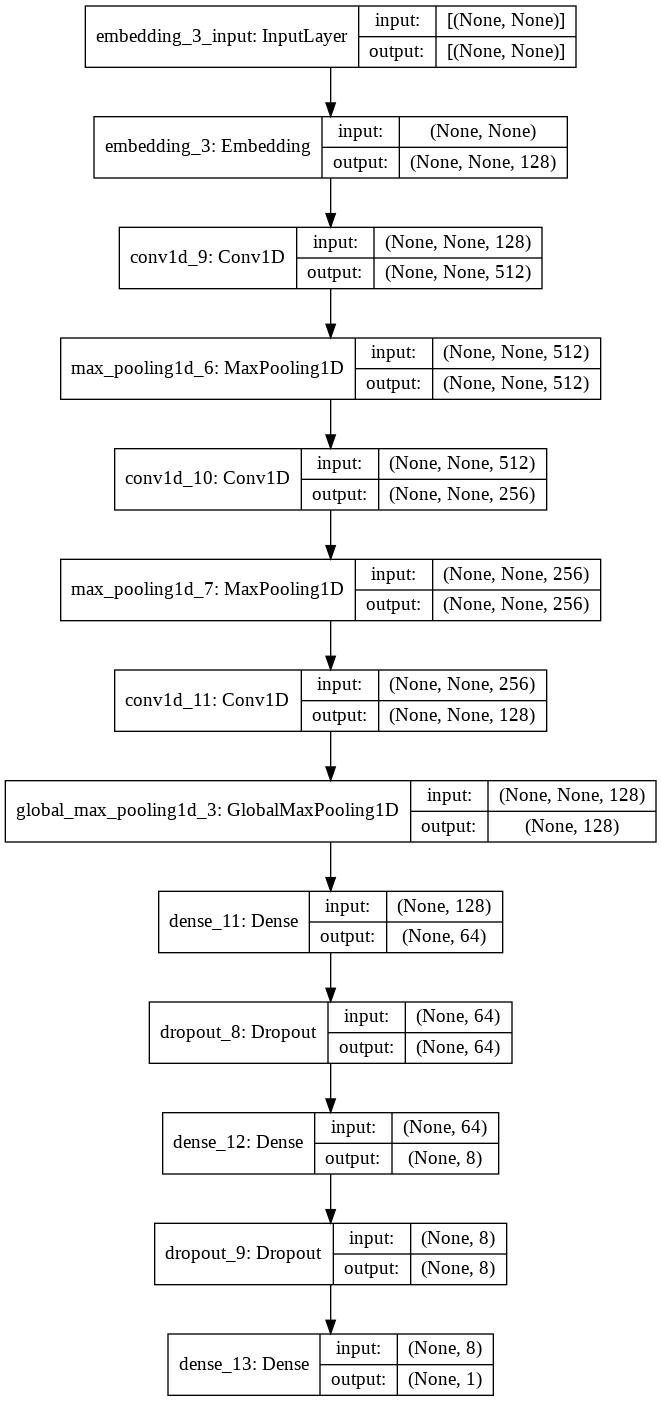

In [ ]:
model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index), 128))
model.add(layers.Conv1D(filters=512, kernel_size=2, activation='relu'))
model.add(layers.MaxPooling1D(pool_size = 2))
model.add(layers.Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size = 2))
model.add(layers.Conv1D(filters=128, kernel_size=4, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary() 

tf.keras.utils.plot_model(model, show_shapes = True, show_layer_names = True)

Epoch 1/10
194/194 [==============================] - 34s 169ms/step - loss: 0.4189 - accuracy: 0.8309 - val_loss: 0.0513 - val_accuracy: 0.9903
Epoch 2/10
194/194 [==============================] - 33s 168ms/step - loss: 0.1076 - accuracy: 0.9785 - val_loss: 0.0489 - val_accuracy: 0.9874
Epoch 3/10
194/194 [==============================] - 33s 168ms/step - loss: 0.0571 - accuracy: 0.9905 - val_loss: 0.0451 - val_accuracy: 0.9859
Epoch 4/10
194/194 [==============================] - 33s 168ms/step - loss: 0.0292 - accuracy: 0.9969 - val_loss: 0.0624 - val_accuracy: 0.9893
Epoch 5/10
194/194 [==============================] - 32s 167ms/step - loss: 0.0215 - accuracy: 0.9985 - val_loss: 0.0964 - val_accuracy: 0.9835
Epoch 6/10
194/194 [==============================] - 33s 168ms/step - loss: 0.0227 - accuracy: 0.9985 - val_loss: 0.0907 - val_accuracy: 0.9855
Epoch 7/10
194/194 [==============================] - 33s 168ms/step - loss: 0.0187 - accuracy: 0.9990 - val_loss: 0.0926 - val_ac

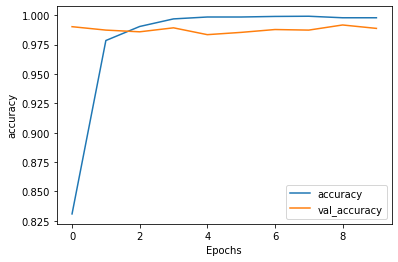

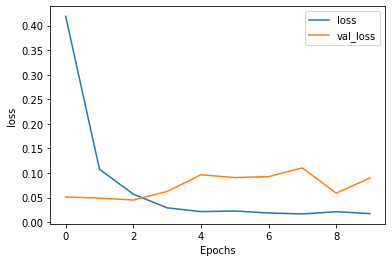


Epoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss
       1   0.830856 	   0.418950 	   0.990301 	   0.051266
       2   0.978514 	   0.107596 	   0.987391 	   0.048905
       3   0.990469 	   0.057073 	   0.985936 	   0.045114
       4   0.996931 	   0.029165 	   0.989331 	   0.062400
       5   0.998546 	   0.021481 	   0.983511 	   0.096439
       6   0.998546 	   0.022688 	   0.985451 	   0.090706
       7   0.999031 	   0.018692 	   0.987876 	   0.092609
       8   0.999192 	   0.016775 	   0.987391 	   0.110403
       9   0.997900 	   0.021166 	   0.991756 	   0.058987
      10   0.997900 	   0.017449 	   0.988846 	   0.089964


In [ ]:
EPOCH = 10
history = model.fit(train_seqs, trainY, epochs = EPOCH, validation_data = (val_seqs, valY), verbose = 1)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

print('\nEpoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['accuracy'][i], history.history['loss'][i], history.history['val_accuracy'][i], history.history['val_loss'][i]))

194/194 [==============================] - 6s 32ms/step - loss: 0.0041 - accuracy: 0.9984
Train Loss: 0.004084119573235512
Train Accuracy: 0.9983844757080078 (Model Metric)
Train Accuracy: 0.9983844911147012 (sklearn Metric)
Train Precision: 0.9992727272727273
Train Recall: 0.9934924078091106
Train F1-score: 0.9963741841914431


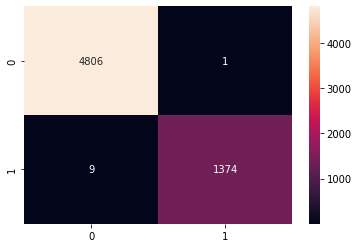

In [ ]:
y_pred = model.predict(train_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(train_seqs, trainY, verbose = 1)
print('Train Loss:', loss)
print('Train Accuracy:', accuracy, '(Model Metric)')
print('Train Accuracy:', accuracy_score(trainY, y_pred), '(sklearn Metric)')
print('Train Precision:', precision_score(trainY, y_pred))
print('Train Recall:', recall_score(trainY, y_pred))
print('Train F1-score:', f1_score(trainY, y_pred))

sns.heatmap(confusion_matrix(trainY, y_pred), annot = True, fmt = 'g')

65/65 [==============================] - 2s 30ms/step - loss: 0.0900 - accuracy: 0.9888
Validation Loss: 0.08996383845806122
Validation Accuracy: 0.9888457655906677 (Model Metric)
Validation Accuracy: 0.9888457807953444 (sklearn Metric)
Validation Precision: 0.975609756097561
Validation Recall: 0.9775967413441955
Validation F1-score: 0.9766022380467956


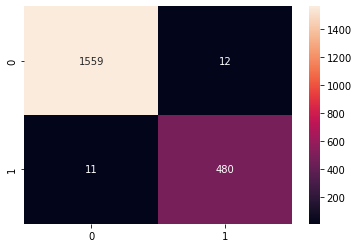

In [ ]:
y_pred = model.predict(val_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(val_seqs, valY, verbose = 1)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy, '(Model Metric)')
print('Validation Accuracy:', accuracy_score(valY, y_pred), '(sklearn Metric)')
print('Validation Precision:', precision_score(valY, y_pred))
print('Validation Recall:', recall_score(valY, y_pred))
print('Validation F1-score:', f1_score(valY, y_pred))

sns.heatmap(confusion_matrix(valY, y_pred), annot = True, fmt = 'g')

65/65 [==============================] - 2s 30ms/step - loss: 0.3541 - accuracy: 0.9680
Test Loss: 0.3541446924209595
Test Accuracy: 0.9679922461509705 (Model Metric)
Test Accuracy: 0.967992240543162 (sklearn Metric)
Test Precision: 0.9746192893401016
Test Recall: 0.8727272727272727
Test F1-score: 0.9208633093525179


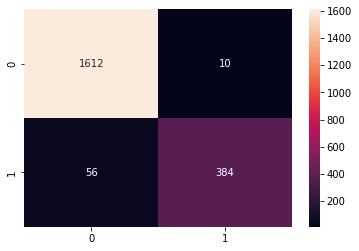

In [ ]:
y_pred = model.predict(test_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(test_seqs, testY, verbose = 1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy, '(Model Metric)')
print('Test Accuracy:', accuracy_score(testY, y_pred), '(sklearn Metric)')
print('Test Precision:', precision_score(testY, y_pred))
print('Test Recall:', recall_score(testY, y_pred))
print('Test F1-score:', f1_score(testY, y_pred))

sns.heatmap(confusion_matrix(testY, y_pred), annot = True, fmt = 'g')